# Classificação Iris - Leave One Out

In [81]:
# PARÂMETROS
random_seed = 42

# FEATURE SELECTION
center_stat = 'mean'

# KNN
k_min = 1
k_max = 11
distance_metric = 'euclidean'
weights = 'uniform'
split_size = 0.2

# GOURMET
palette = ['limegreen', 'indianred', 'gold']

In [82]:
import numpy
import pandas
import seaborn
from matplotlib import pyplot
from sklearn.datasets import load_iris
from sklearn.model_selection import LeaveOneOut, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [83]:
ks = [k for k in range(k_min, k_max + 2, 2)]

print(ks)

[1, 3, 5, 7, 9, 11]


### PRÉ-PROCESSAMENTO

In [ ]:
iris_dict = load_iris()
iris = pandas.DataFrame.from_dict(iris_dict['data'])
x_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x_columns_species = x_columns + ['species']
column_names = x_columns + ['target', 'species']
iris.columns = iris_dict['feature_names']
iris['target'] = iris_dict['target']
iris['species'] = iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris.columns = column_names
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


### PairPlots

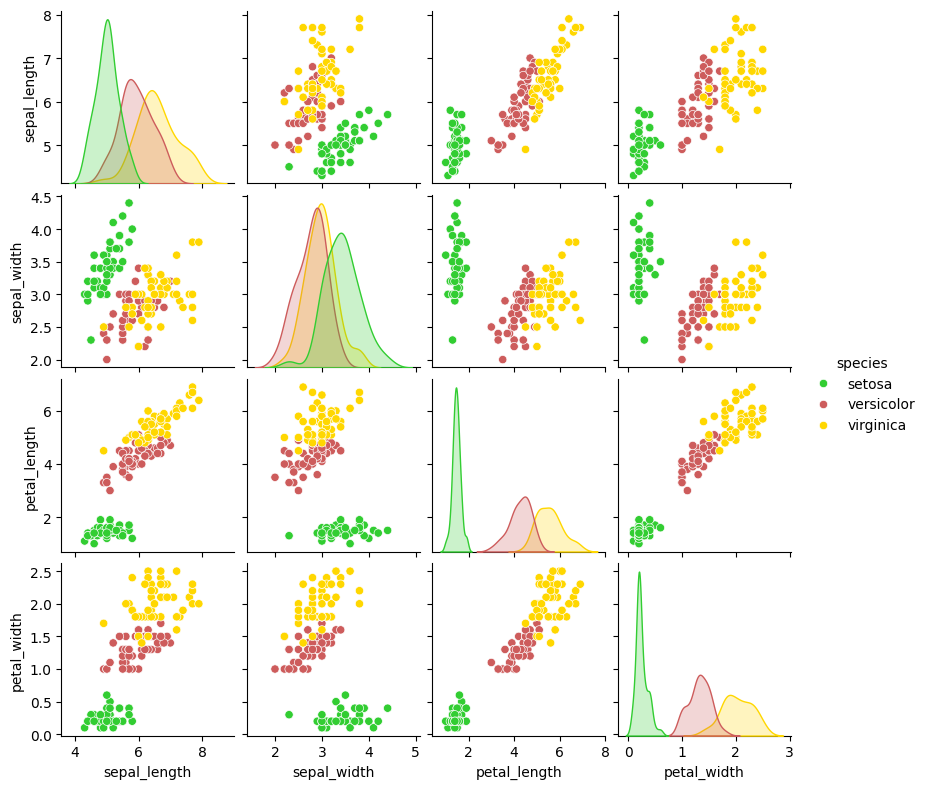

In [85]:
_ = seaborn.pairplot(iris[x_columns_species], hue='species', height=2.0, palette=palette)

### BOXPLOTS VARIAVEIS VS CLASSE

In [86]:
all_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
centers = iris.groupby(['species'])[all_cols].agg(center_stat).T
max_diff = (centers.T.max() - centers.T.min()).sort_values(ascending=False)

max_diff

petal_length    4.090
petal_width     1.780
sepal_length    1.582
sepal_width     0.658
dtype: float64

In [87]:
max_diff.index.tolist()

['petal_length', 'petal_width', 'sepal_length', 'sepal_width']

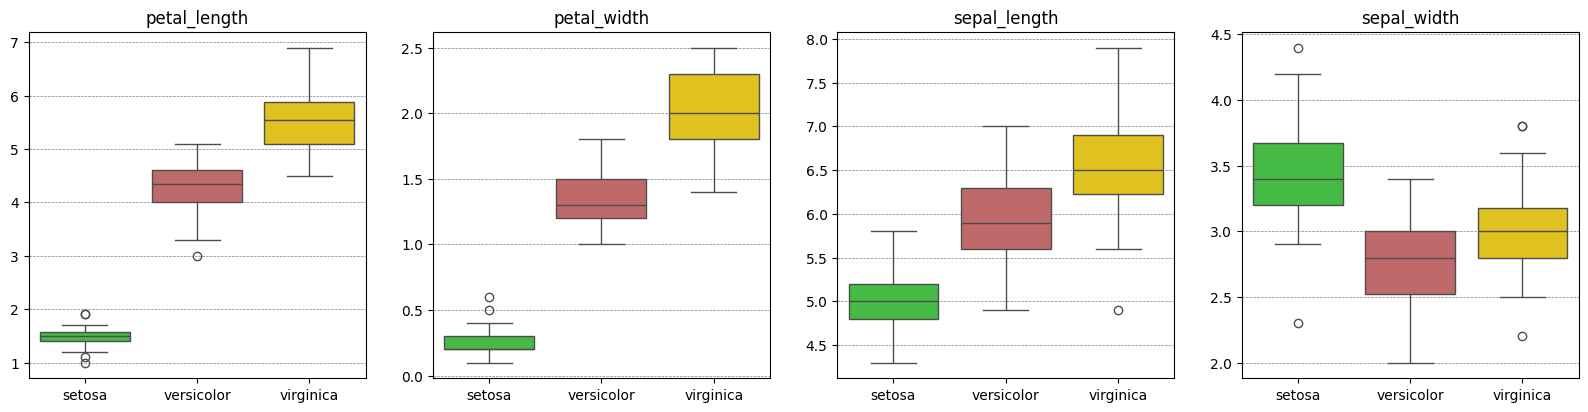

In [88]:
x_cols_sorted = max_diff.index.tolist()

# BOXPLOT DOS ATRIBUTOS VS CLASSE
fig, axs = pyplot.subplots(1, 4, figsize=(20, 4.5))
for i, ax in enumerate(axs.flatten()):
    seaborn.boxplot(x='species', y=x_cols_sorted[i], data=iris, ax=ax, hue='species', dodge=False, palette=palette)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(x_cols_sorted[i])
    ax.grid(which='both', axis='y', color='gray', linestyle='--', linewidth=0.5)

### Classificador - K Vizinhos mais Próximos


In [89]:
# SET THE RANDOM SEED
numpy.random.seed(random_seed)

# BUILD A LOOP FOR N_FEATURES AND K NEIGHBORS AND EVALUATE LEAVE ONE OUT ACCURACY
n_features = len(x_cols_sorted)

# SCALE THE DATA
scaler = StandardScaler()
Xs = scaler.fit_transform(iris[x_cols_sorted])
y = iris['target']

# LEAVE ONE OUT
loo = LeaveOneOut()
loo.get_n_splits(Xs)

# TRAINING LOOP
accuracy_list = []
ix_loo = 0
for n_feature in range(1, n_features + 1):
    for k in ks:
        for train_index, test_index in loo.split(Xs):
            X_train, X_test = Xs[train_index][:, :n_feature], Xs[test_index][:, :n_feature]
            y_train, y_test = y[train_index], y[test_index]

            # FIT THE MODEL
            knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric, weights=weights, n_jobs=-1)
            knn.fit(X_train, y_train)

            # PREDICT
            y_pred = knn.predict(X_test)

            # EVALUATE
            train_accuracy = accuracy_score(y_train, knn.predict(X_train))
            test_hit = accuracy_score(y_test, y_pred)
            accuracy_list.append({'f': n_feature, 'k': k, 'fk' : f'{n_feature}_{k}', 'accuracy': train_accuracy, 'hit' : test_hit, 'knn': knn})
            print(f'{str(ix_loo).zfill(4)} > f={n_feature} k={k} | {100.0*train_accuracy:.0f}% > {test_hit:.0f}')
            ix_loo += 1

0000 > f=1 k=1 | 89% > 1
0001 > f=1 k=1 | 89% > 1
0002 > f=1 k=1 | 89% > 1
0003 > f=1 k=1 | 89% > 1
0004 > f=1 k=1 | 89% > 1
0005 > f=1 k=1 | 89% > 1
0006 > f=1 k=1 | 89% > 1
0007 > f=1 k=1 | 89% > 1
0008 > f=1 k=1 | 89% > 1
0009 > f=1 k=1 | 89% > 1
0010 > f=1 k=1 | 89% > 1
0011 > f=1 k=1 | 89% > 1
0012 > f=1 k=1 | 89% > 1
0013 > f=1 k=1 | 89% > 1
0014 > f=1 k=1 | 89% > 1
0015 > f=1 k=1 | 89% > 1
0016 > f=1 k=1 | 89% > 1
0017 > f=1 k=1 | 89% > 1
0018 > f=1 k=1 | 89% > 1
0019 > f=1 k=1 | 89% > 1
0020 > f=1 k=1 | 89% > 1
0021 > f=1 k=1 | 89% > 1
0022 > f=1 k=1 | 89% > 1
0023 > f=1 k=1 | 89% > 1
0024 > f=1 k=1 | 89% > 1
0025 > f=1 k=1 | 89% > 1
0026 > f=1 k=1 | 89% > 1
0027 > f=1 k=1 | 89% > 1
0028 > f=1 k=1 | 89% > 1
0029 > f=1 k=1 | 89% > 1
0030 > f=1 k=1 | 89% > 1
0031 > f=1 k=1 | 89% > 1
0032 > f=1 k=1 | 89% > 1
0033 > f=1 k=1 | 89% > 1
0034 > f=1 k=1 | 89% > 1
0035 > f=1 k=1 | 89% > 1
0036 > f=1 k=1 | 89% > 1
0037 > f=1 k=1 | 89% > 1
0038 > f=1 k=1 | 89% > 1
0039 > f=1 k=1 | 89% > 1


In [90]:
# CONVERT TO DATAFRAME
accuracies = pandas.DataFrame(accuracy_list)

accuracies

,f,k,fk,accuracy,hit,knn
0,1,1,1_1,0.892617,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
1,1,1,1_1,0.892617,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
2,1,1,1_1,0.892617,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
3,1,1,1_1,0.892617,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
4,1,1,1_1,0.892617,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
...,...,...,...,...,...,...
3595,4,11,4_11,0.959732,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
3596,4,11,4_11,0.959732,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
3597,4,11,4_11,0.959732,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."
3598,4,11,4_11,0.959732,1.0,"KNeighborsClassifier(metric='euclidean', n_job..."


In [98]:
loo_estimation = accuracies[['fk', 'hit', 'accuracy']].groupby(['fk']).agg(['mean', 'std']).reset_index()
loo_estimation.columns = ['fk', 'hit', 'std', 'accuracy', 'std_accuracy']
loo_estimation['upper'] = [min(upper, 1.0) for upper in loo_estimation.hit + 2*loo_estimation['std']]
loo_estimation['lower'] = [max(lower, 0.0) for lower in loo_estimation.hit - 2*loo_estimation['std']]
loo_estimation = loo_estimation.sort_values(['hit', 'lower', 'accuracy'], ascending=[False, False, False]).reset_index(drop=True)

loo_estimation

,fk,hit,std,accuracy,std_accuracy,upper,lower
0,2_7,0.966667,0.180107,0.973199,0.000951,1.0,0.606453
1,2_5,0.966667,0.180107,0.966935,0.001920,1.0,0.606453
2,2_1,0.966667,0.180107,0.986756,0.001335,1.0,0.606453
3,3_3,0.966667,0.180107,0.966667,0.001209,1.0,0.606453
4,4_7,0.960000,0.196616,0.966890,0.002418,1.0,0.566769
5,3_5,0.960000,0.196616,0.966577,0.000943,1.0,0.566769
6,2_9,0.960000,0.196616,0.966488,0.001649,1.0,0.566769
7,3_7,0.960000,0.196616,0.960179,0.001851,1.0,0.566769
8,2_11,0.960000,0.196616,0.960000,0.001320,1.0,0.566769
9,3_9,0.953333,0.211631,0.966309,0.001819,1.0,0.530072


In [99]:
winner = loo_estimation.loc[0, :]

winner

fk                   2_7
hit             0.966667
std             0.180107
accuracy        0.973199
std_accuracy    0.000951
upper                1.0
lower           0.606453
Name: 0, dtype: object

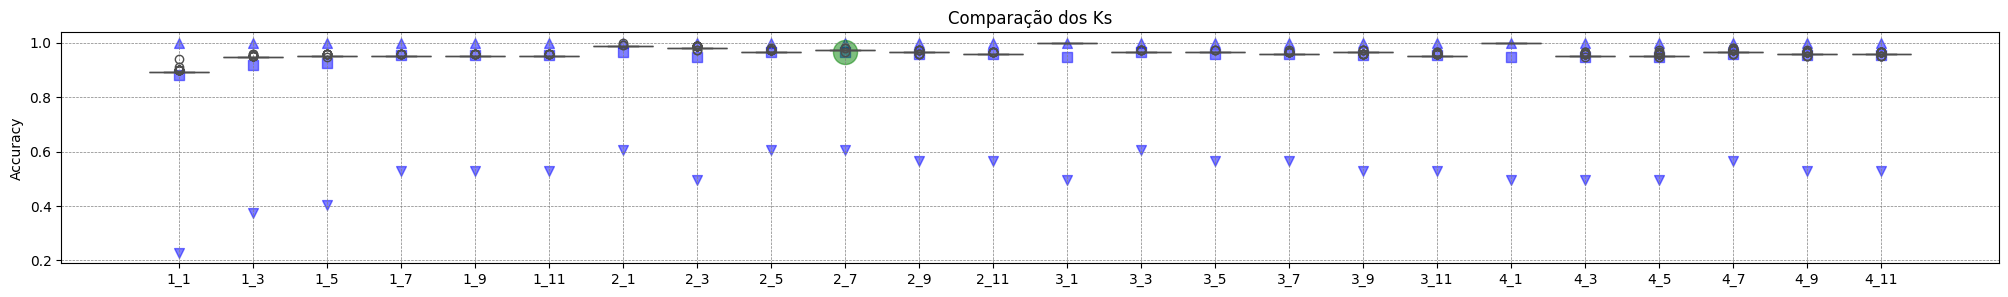

In [100]:
fig = pyplot.figure(figsize=(25, 3))
ax = fig.add_subplot(111)
_ = seaborn.boxplot(x='fk', y='accuracy', data=accuracies, ax=ax, color='gray')
ax.set_title('Comparação dos Ks')
ax.set_ylabel('Accuracy')
ax.set_xlabel('')
# ax.set_ylim(min([accuracies['accuracy'].min(), loo_estimation['hit'].min()]), 1.0)

ax.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
_ = ax.scatter(loo_estimation.fk, loo_estimation["upper"], color='blue', marker='^', s=50, label='Mean Hit', alpha=0.5)
_ = ax.scatter(loo_estimation.fk, loo_estimation.hit, color='blue', marker='s', s=50, label='Mean Hit', alpha=0.5)
_ = ax.scatter(loo_estimation.fk, loo_estimation["lower"], color='blue', marker='v', s=50, label='Mean Hit', alpha=0.5)

# plot the winner
_ = ax.scatter(winner.fk, winner.hit, color='green', marker='o', s=300, label='Winner', alpha=0.5)

In [ ]:
# retrain with best parameters
winner_f, winner_k = winner.fk.split('_')
winner_f = int(winner_f)
winner_k = int(winner_k)

X_train, X_test, y_train, y_test = train_test_split(Xs[:, :winner_f], y, test_size=split_size, random_state=random_seed)
knn = KNeighborsClassifier(n_neighbors=winner_k, metric=distance_metric, weights=weights, n_jobs=-1)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
winner_train_accuracy = accuracy_score(y_train, knn.predict(X_train))
winner_test_accuracy = accuracy_score(y_test, y_pred)
winner_all_accuracy = accuracy_score(y, knn.predict(Xs[:, :winner_f]))

### VISUALIZAR MATRIZ DE CONFUSÃO E ROC

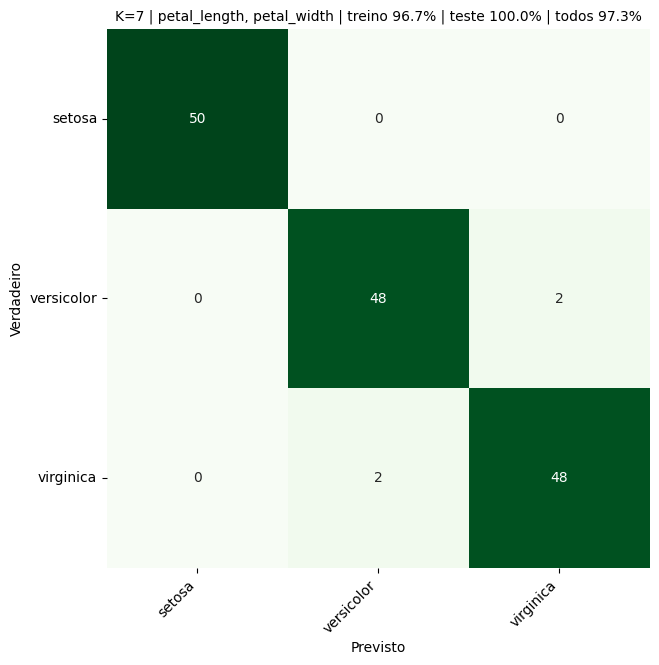

In [108]:
winner_y_pred = knn.predict(Xs[:, :winner_f])

fig = pyplot.figure(figsize=(7, 7))
# PLOT CONFUSION MATRIX
conf_matrix = confusion_matrix(y, winner_y_pred)

ax = fig.add_subplot(111)
_ = seaborn.heatmap(conf_matrix, annot=True, cmap='Greens', cbar=False, ax=ax)
_ = ax.set_xlabel('Previsto')
_ = ax.set_ylabel('Verdadeiro')
_ = ax.set_xticklabels(iris['species'].unique(), rotation=45, ha='right')
_ = ax.set_yticklabels(iris['species'].unique(), rotation=0, ha='right')
# _ = ax.set_title(f'Vencedor: {winner.fk} | treino {100.0*winner_train_accuracy:.0f}% | teste {100.0*winner.hit:.0f}%')
best_feat_string = ', '.join(x_cols_sorted[:winner_f])
_ = ax.set_title(f'K={winner_k} | {best_feat_string} | treino {100.0*winner_train_accuracy:.1f}% | teste {100.0*winner_test_accuracy:.1f}% | todos {100.0*winner_all_accuracy:.1f}%', size=10)